### epl 크롤링

In [663]:
# selenium으로 URL에 접속
from selenium import webdriver
import time
# webdriver 설치 경로 확인
# driver = webdriver.Chrome('C:/Users/훈련생/git/learning_python/03_WebConn/4_selenium_class/webdriver/chromedriver.exe')
driver = webdriver.Chrome('C:/Users/jyson/git/learning_python/03_WebConn/4_selenium_class/webdriver/chromedriver.exe')

# 최대사이즈
driver.maximize_window()

url = "https://www.premierleague.com/tables"
driver.get(url)

In [665]:
# 쿠키 설정시 클릭
driver.implicitly_wait(3)
driver.find_element_by_class_name('cookies-notice-accept').click()
driver.find_element_by_id('advertClose').click()

In [666]:
# 리스트 갯수
ul = driver.find_elements_by_xpath('/html/body/main/div[2]/div[1]/div[1]/section/div[3]/ul/li')
print(len(ul))

round = [] # 라운드
rank = [] # 순위

# 라운드 순회
for i in range(len(ul) - 1):
    time.sleep(1)
    driver.find_elements_by_class_name('current')[2].click()
    time.sleep(1)
    ul[i + 1].click()
    time.sleep(1)
    tr = driver.find_element_by_xpath("//tr[@data-filtered-table-row-name='Tottenham Hotspur']")

    print('라운드 : ' + str(i + 1) + ', 순위 : ' + str(tr.text.split("\n")[0]))
    round.append(i + 1)

    # 데이터 크롤링 실패시
    if tr.text.split("\n")[0] == '':
        while(tr.text.split("\n")[0] == ''):
            print("재시도 . . .")
            driver.refresh()
            time.sleep(3)
            driver.get(url)

            time.sleep(1)
            driver.find_elements_by_class_name('current')[2].click()
            time.sleep(1)
            ul = driver.find_elements_by_xpath('/html/body/main/div[2]/div[1]/div[1]/section/div[3]/ul/li')
            ul[i + 1].click()
            time.sleep(5)
            tr = driver.find_element_by_xpath("//tr[@data-filtered-table-row-name='Tottenham Hotspur']")

            print('라운드 : ' + str(i + 1) + ', 순위 : ' + str(tr.text.split("\n")[0]))

            rank.append(int(tr.text.split("\n")[0].strip()))
        else:
            print('라운드 : ' + str(i + 1) + ', 순위 : ' + str(tr.text.split("\n")[0]))
    else:
        rank.append(int(tr.text.split("\n")[0].strip()))

38
라운드 : 1, 순위 : 11
라운드 : 2, 순위 : 6
라운드 : 3, 순위 : 8
라운드 : 4, 순위 : 6
라운드 : 5, 순위 : 7
라운드 : 6, 순위 : 5
라운드 : 7, 순위 : 3
라운드 : 8, 순위 : 2
라운드 : 9, 순위 : 1
라운드 : 10, 순위 : 1
라운드 : 11, 순위 : 1
라운드 : 12, 순위 : 1
라운드 : 13, 순위 : 2
라운드 : 14, 순위 : 6
라운드 : 15, 순위 : 5
라운드 : 16, 순위 : 7
라운드 : 17, 순위 : 4
라운드 : 18, 순위 : 6
라운드 : 19, 순위 : 5
라운드 : 20, 순위 : 6
라운드 : 21, 순위 : 6
라운드 : 22, 순위 : 8
라운드 : 23, 순위 : 8
라운드 : 24, 순위 : 9
라운드 : 25, 순위 : 9
라운드 : 26, 순위 : 8
라운드 : 27, 순위 : 
재시도 . . .
라운드 : 27, 순위 : 7
라운드 : 27, 순위 : 7
라운드 : 28, 순위 : 8
라운드 : 29, 순위 : 6
라운드 : 30, 순위 : 6
라운드 : 31, 순위 : 7
라운드 : 32, 순위 : 6
라운드 : 33, 순위 : 7
라운드 : 34, 순위 : 6
라운드 : 35, 순위 : 7
라운드 : 36, 순위 : 6
라운드 : 37, 순위 : 7


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[11, 6, 8, 6, 7, 5, 3, 2, 1, 1, 1, 1, 2, 6, 5, 7, 4, 6, 5, 6, 6, 8, 8, 9, 9, 8, 7, 8, 6, 6, 7, 6, 7, 6, 7, 6, 7]
37


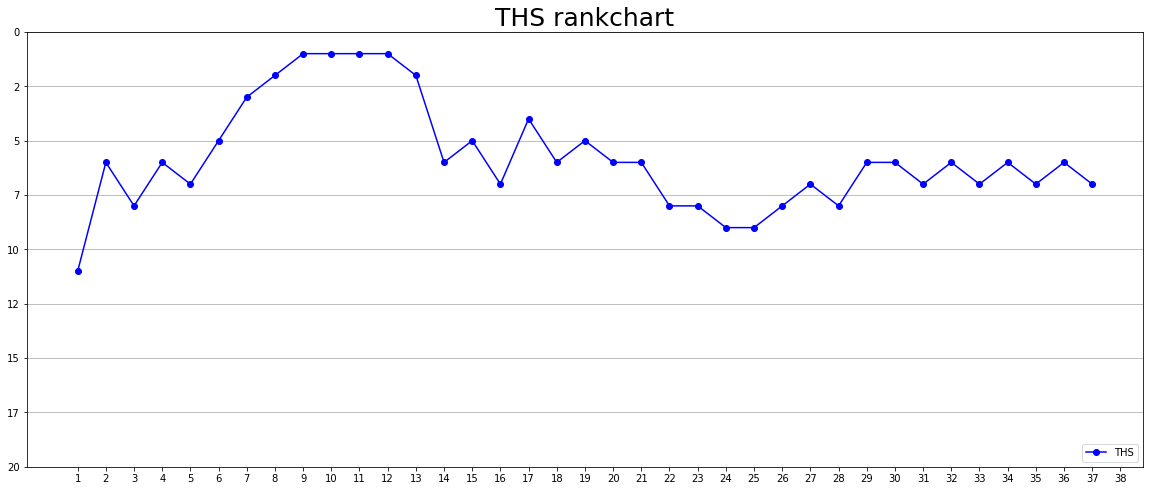

In [692]:
print(round)
print(rank)
print(len(rank))

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

plt.figure(figsize=(20, 8))
# X축 눈금
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])
plt.ylim([int(20), int(0)]) # Y축의 범위

plt.title('THS rankchart')
plt.gca().title.set_size(25)

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) # 소수점 제거

# 격자무늬
plt.grid(True, axis='y')

plt.plot(round, rank, color='blue',  marker='o', label=('THS'))
plt.legend(loc=4)
plt.show()